The data used in this notebook has been downloaded from data.un.org (http://data.un.org/Explorer.aspx) Homicide statistics from United Nations Office on Drugs and Crime. It contains homicide statistics from all countries in the world. The statistics covers intentional homicide victims, their counts and rates per 100 000 population from 2000 until 2016. Information is not available in all countries for all years. The term intentional homicide means unlawful death inflicted upon a person with the intent to cause death or serious injury. It does not contain victims of terror attacks. A note about term country. It is misleading, as the data contains information about 229 separate areas. For instance Great Britain is listed several times as Scotland, England combined with Wales and Ireland are reported separately.

I downloaded the excel, removed unwanted sheets and rows in excel (definitions and information separated into men and women etc.). I divided the rates and counts into separate files also in excel. 

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [124]:
orig_counts = pd.read_excel("intentional_homicides_counts.xlsx")
orig_counts.head(10)

,Region,Subregion,UNODC Name,N2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Africa,Eastern Africa,Burundi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,341.00,376.00,347.000000,349.00,500.00,520.0,564.0,461.000000,635.0
1,Africa,Eastern Africa,Comoros,56.203224,NaN,NaN,NaN,NaN,58.332588,NaN,NaN,NaN,NaN,58.830131,NaN,NaN,NaN,NaN,59.886758,NaN
2,Africa,Eastern Africa,Djibouti,64.151692,NaN,NaN,NaN,NaN,63.492031,NaN,NaN,NaN,NaN,63.114153,NaN,NaN,NaN,NaN,60.140082,NaN
3,Africa,Eastern Africa,Eritrea,335.088646,NaN,NaN,NaN,NaN,381.805385,NaN,NaN,NaN,NaN,389.337700,NaN,NaN,NaN,NaN,389.898916,NaN
4,Africa,Eastern Africa,Ethiopia,7113.315835,NaN,NaN,NaN,NaN,7214.180127,NaN,NaN,NaN,NaN,7418.717200,NaN,NaN,NaN,NaN,7552.011644,NaN
5,Africa,Eastern Africa,Kenya,NaN,NaN,NaN,NaN,1199.7,1083.600000,1105.96,1101.66,1215.18,1907.48,1925.540000,2271.26,2374.46,2450.0,2305.0,2261.000000,2363.0
6,Africa,Eastern Africa,Madagascar,1792.590437,NaN,NaN,NaN,NaN,1841.581074,NaN,NaN,NaN,NaN,1941.137512,NaN,NaN,NaN,NaN,1862.817304,NaN
7,Africa,Eastern Africa,Malawi,700.000000,900.0,567.0,300.0,411.0,200.000000,821.00,690.00,780.00,320.00,520.000000,343.00,279.00,NaN,NaN,NaN,NaN
8,Africa,Eastern Africa,Mauritius,26.000000,NaN,NaN,39.0,35.0,37.000000,50.00,45.00,48.00,38.00,33.000000,34.00,29.00,35.0,19.0,21.000000,23.0
9,Africa,Eastern Africa,Mayotte,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.00,5.00,12.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [125]:
# basic exploration
orig_counts.describe()

,N2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
count,151.000000,135.000000,135.000000,150.000000,161.000000,184.000000,165.000000,166.000000,179.000000,176.000000,196.000000,159.000000,163.000000,138.000000,132.000000,142.000000,99.000000
mean,2384.055217,2410.109321,2420.096505,2211.070762,1999.508221,1904.215840,1822.861331,1766.244940,1766.163017,1798.690227,1776.805787,1939.441887,1934.225363,2128.492754,2360.106061,2300.851691,2895.141414
std,7352.235025,7787.131043,7864.421269,7104.040244,6678.975608,6102.839537,6149.900880,5987.509453,5858.668181,5851.591809,5573.300891,6309.535344,6463.760831,6894.035111,7341.455949,7065.858893,8519.605645
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,46.000000,29.000000,37.000000,35.250000,27.000000,36.250000,23.000000,25.250000,23.500000,22.500000,39.000000,34.000000,28.500000,36.500000,35.750000,56.250000,45.000000
50%,249.000000,219.000000,203.000000,205.500000,164.000000,170.000000,130.000000,131.000000,144.000000,142.000000,190.440812,168.000000,166.000000,161.500000,167.500000,261.500000,208.000000
75%,901.000000,784.500000,797.500000,784.000000,743.000000,739.500000,610.000000,651.250000,729.000000,742.750000,797.250000,833.000000,786.000000,671.250000,735.000000,853.000000,894.000000
max,51344.000000,49403.000000,48711.000000,46827.614240,46490.000000,45095.000000,45099.000000,45362.000000,45999.000000,45824.000000,46460.000000,48084.000000,53054.000000,54163.000000,57091.000000,58459.000000,61283.000000


In [126]:
# I am using median, because it is less sensitive to outliers.
orig_counts.groupby(['Region']).median()
# While looking at counts is interesting, it does mean one cannot compare one region to another.
# Therefore I'll continue with rates per 100 000.

,N2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Region,,,,,,,,,,,,,,,,,
Africa,475.288940,543.0,431.5,471.0,337.0,393.0,286.5,271.0,328.0,289.0,432.853975,432.0,523.0,500.0,564.0,503.858429,635.0
Americas,167.000000,80.0,143.0,203.0,79.0,142.0,122.5,154.5,189.5,366.5,505.000000,577.5,548.0,575.0,573.0,617.000000,679.0
Asia,551.000000,306.0,330.0,405.0,376.5,400.5,289.0,279.0,263.0,331.0,285.000000,347.5,202.0,228.5,238.0,333.500000,235.0
Europe,145.500000,139.5,137.0,149.0,132.5,116.0,114.5,113.0,99.0,85.0,91.000000,86.0,79.0,71.0,81.0,66.000000,72.0
Oceania,4.824694,7.0,6.5,8.0,14.5,6.5,11.0,12.0,9.0,8.0,5.000000,8.0,2.0,19.0,32.5,5.257534,115.0


In [127]:
orig_rates = pd.read_excel("intentional_homicides_rates.xlsx")
orig_rates.head(10)

,Region,Subregion,UNODC Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Africa,Eastern Africa,Burundi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.152326,4.429245,3.958056,3.859122,5.364974,5.416562,5.701698,4.519931,6.020522
1,Africa,Eastern Africa,Comoros,10.362773,NaN,NaN,NaN,NaN,9.537281,NaN,NaN,NaN,NaN,8.529913,NaN,NaN,NaN,NaN,7.703230,NaN
2,Africa,Eastern Africa,Djibouti,8.939956,NaN,NaN,NaN,NaN,8.106187,NaN,NaN,NaN,NaN,7.415197,NaN,NaN,NaN,NaN,6.484707,NaN
3,Africa,Eastern Africa,Eritrea,9.876460,NaN,NaN,NaN,NaN,9.619670,NaN,NaN,NaN,NaN,8.867044,NaN,NaN,NaN,NaN,8.044168,NaN
4,Africa,Eastern Africa,Ethiopia,10.690714,NaN,NaN,NaN,NaN,9.402391,NaN,NaN,NaN,NaN,8.458941,NaN,NaN,NaN,NaN,7.561612,NaN
5,Africa,Eastern Africa,Kenya,NaN,NaN,NaN,NaN,3.420392,3.005968,2.984882,2.892566,3.104034,4.740588,4.656670,5.345797,5.440191,5.465474,5.008229,4.786577,4.873436
6,Africa,Eastern Africa,Madagascar,11.369395,NaN,NaN,NaN,NaN,10.043130,NaN,NaN,NaN,NaN,9.177244,NaN,NaN,NaN,NaN,7.686765,NaN
7,Africa,Eastern Africa,Malawi,6.153212,7.695029,4.719607,2.431771,3.242338,1.533776,6.113515,4.985200,5.465540,2.174711,3.428475,2.194832,1.733209,NaN,NaN,NaN,NaN
8,Africa,Eastern Africa,Mauritius,2.193824,NaN,NaN,3.225822,2.879054,3.027816,4.071336,3.646941,3.873176,3.054603,2.644326,2.717776,2.313760,2.788200,1.511272,1.667387,1.821945
9,Africa,Eastern Africa,Mayotte,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.203200,2.547394,5.925838,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [128]:
orig_rates.describe()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
count,151.000000,135.000000,135.000000,150.000000,161.000000,184.000000,165.000000,166.000000,179.000000,176.000000,196.000000,159.000000,163.000000,138.000000,132.000000,142.000000,99.000000
mean,8.233995,8.044094,8.634548,7.927020,8.031967,7.917391,7.779217,7.744555,7.981760,8.030265,8.062424,7.962590,7.941796,6.831329,7.264843,7.210479,8.202577
std,10.429638,11.549672,11.752765,11.163309,11.239948,10.397031,11.117132,11.541633,11.515321,12.456049,11.676806,13.335671,12.210047,10.627677,11.854172,12.480831,13.984879
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.854547,1.573835,1.530837,1.432105,1.583516,1.549061,1.427113,1.362339,1.358499,1.269034,1.508689,1.088060,1.140959,0.954196,0.943317,1.014167,0.953776
50%,4.698678,3.509676,3.492583,3.195457,2.941688,3.950125,3.110337,2.841692,3.529000,3.097348,3.685372,2.576799,3.049602,2.444338,2.687428,3.277736,2.163779
75%,10.560685,9.831737,10.716128,9.074329,8.422117,10.220080,8.231368,8.136160,8.320407,8.253748,9.493319,8.846385,8.282669,7.659627,7.511315,7.957935,7.680117
max,65.684159,67.920812,68.283135,57.905938,64.941612,64.389204,64.839664,57.483593,58.026136,71.399755,76.097241,85.061545,84.320462,74.279969,66.873147,105.441952,82.842257


Maximum values are surprisingly big. Let's look at regions.

In [129]:
regions = orig_rates.groupby(['Region']).median().transpose()
regions

Region,Africa,Americas,Asia,Europe,Oceania
2000,10.598127,12.343333,2.782312,1.908038,2.406297
2001,7.695029,10.634579,2.659419,1.925932,3.229859
2002,5.921744,13.712047,2.562859,1.862865,1.696620
2003,3.259828,13.431014,2.493585,1.591909,3.061369
2004,3.955397,17.428278,2.385690,1.749870,2.401216
2005,9.305974,15.304994,2.352166,1.499960,3.378733
2006,3.224898,13.447051,2.354722,1.482928,3.383594
2007,2.967598,13.026936,2.102166,1.496768,1.727026
2008,4.152326,14.229737,2.399047,1.497198,3.419726
2009,3.804249,15.816099,2.239460,1.225902,3.140092


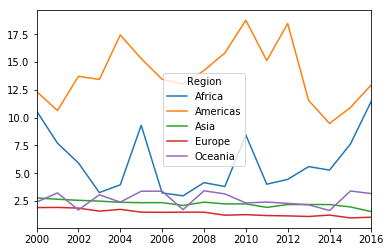

In [130]:
regions.plot.line()

From this graph it is fairly visible that Europe consistently has the lowest rates of homicide. Only in 2002 does Oceania dip slightly lower. Asia has slightly higher rates than Europe and is also fairly consistent. There is more variation in Oceania, which has third lowest rates. However, these three all have fairly low rates of homicide  compared to Africa and Americas. Of these two, Africa is lower and only in peak years does it reach the rates Americas has at it's lowest years. In the years where Africa's rates are low, they are close to Oceania and Asia. The Americas can be said to be in a group of it's own. Let's look at different countries next.

In [138]:
# creating a copy of data in order to tidy it up for further analysis 
# (see here: https://www.jeannicholashould.com/tidy-data-in-python.html)
rates_copy = orig_rates.copy()
# dropping unnecessary columns
country_rates = rates_copy.drop(['Subregion'], axis=1)
# creating one table for later use
country_nomis = country_rates.dropna()
# tidying up rates
rates = pd.melt(country_rates, ['Region', 'UNODC Name'], var_name="year", value_name="rate")
rates = rates.sort_values(by=['UNODC Name'])
# checking results
rates.head(20)
# Need to sort based on name and year
rates.sort_values(['UNODC Name', "year"], inplace = True)
rates.head(20)

,Region,UNODC Name,year,rate
131,Asia,Afghanistan,2000,NaN
361,Asia,Afghanistan,2001,NaN
591,Asia,Afghanistan,2002,NaN
821,Asia,Afghanistan,2003,NaN
1051,Asia,Afghanistan,2004,NaN
1281,Asia,Afghanistan,2005,NaN
1511,Asia,Afghanistan,2006,NaN
1741,Asia,Afghanistan,2007,NaN
1971,Asia,Afghanistan,2008,NaN
2201,Asia,Afghanistan,2009,3.981527


In [122]:
fig = px.line(rates, x="year", y="rate", color="Region", line_group='UNODC Name', hover_name='UNODC Name')
fig.show()
# So there is a big variance between countries in the Americas (see interactive image below)

In [132]:
# Let's look at it without Americas. This can be done in the image above by clicking the regions in the legend.
# they can be clicked on and off.

rates_sans_americas = rates[rates.Region != "Americas"]
fig = px.line(rates_sans_americas, x="year", y="rate", color="Region", line_group='UNODC Name', hover_name='UNODC Name')
fig.show()

In [133]:
# Let's examine this one continent at a time
americas = rates[rates.Region == "Americas"]
fig_amer = px.line(americas, x="year", y="rate", color='UNODC Name', title='Rates of homicide in the Americas per 100 000 inhabitants')
fig_amer

In [134]:
europe = rates[rates.Region == "Europe"]
fig_eur = px.line(europe, x="year", y="rate", color='UNODC Name', title='Rates of homicide in Europe per 100 000 inhabitants')
fig_eur

In [135]:
asia = rates[rates.Region == "Asia"]
fig_asia = px.line(asia, x="year", y="rate", color='UNODC Name', title='Rates of homicide in Asia per 100 000 inhabitants')
fig_asia

In [136]:
africa = rates[rates.Region == "Africa"]
fig_afr = px.line(africa, x="year", y="rate", color='UNODC Name', title='Rates of homicide in Africa per 100 000 inhabitants')
fig_afr

In [137]:
oceania = rates[rates.Region == "Oceania"]
fig_oce = px.line(oceania, x="year", y="rate", color='UNODC Name', title='Rates of homicide in Oceania per 100 000 inhabitants')
fig_oce

Finally I want to look at trends. For this I need data with less missing values. As is evident from the figures above, there are a lot of missing information. Let's drop all the countries with missing information.

In [141]:
rates_nomis = pd.melt(country_nomis, ['Region', 'UNODC Name'], var_name="year", value_name="rate")
rates_nomis = rates_nomis.sort_values(by=['UNODC Name', 'year'])
rates_nomis = rates_nomis.rename(columns={"UNODC Name": "name"})
# checking data
rates_nomis.head(20)

,Region,name,year,rate
53,Europe,Albania,2000,4.196069
120,Europe,Albania,2001,7.045844
187,Europe,Albania,2002,6.925232
254,Europe,Albania,2003,5.335896
321,Europe,Albania,2004,4.228880
388,Europe,Albania,2005,5.001333
455,Europe,Albania,2006,3.110337
522,Europe,Albania,2007,3.472329
589,Europe,Albania,2008,3.108651
656,Europe,Albania,2009,2.869068


In [143]:
# Countries with data in all 16 years of the UN datasheet are:
rates_nomis.name.unique()

array(['Albania', 'Armenia', 'Australia', 'Austria', 'Bahamas', 'Belize',
       'Bermuda', 'Brazil', 'Bulgaria', 'Canada', 'China',
       'China, Hong Kong Special Administrative Region',
       'China, Macao Special Administrative Region', 'Colombia',
       'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Ecuador', 'El Salvador', 'Finland', 'France', 'Germany',
       'Greenland', 'Grenada', 'Guatemala', 'Guyana', 'Honduras',
       'Hungary', 'Iceland', 'India', 'Ireland', 'Italy', 'Jamaica',
       'Japan', 'Kyrgyzstan', 'Liechtenstein', 'Lithuania', 'Mexico',
       'Myanmar', 'Netherlands', 'Nicaragua', 'Norway', 'Pakistan',
       'Panama', 'Philippines*', 'Poland#', 'Portugal', 'Puerto Rico',
       'Romania#', 'Serbia', 'Singapore', 'Slovakia', 'Slovenia',
       'South Africa', 'Spain', 'Sweden', 'Switzerland', 'Thailand',
       'United Kingdom (England and Wales)',
       'United Kingdom (Northern Ireland)', 'United Kingdom (Scotland)',
       'Uni

In [148]:
# Now let's look at the difference between different years
rates_nomis['change'] = rates_nomis.groupby(['name']).rate.diff().fillna(0)
rates_nomis.head(40) # checking results

,Region,name,year,rate,change
53,Europe,Albania,2000,4.196069,0.000000
120,Europe,Albania,2001,7.045844,2.849776
187,Europe,Albania,2002,6.925232,-0.120612
254,Europe,Albania,2003,5.335896,-1.589336
321,Europe,Albania,2004,4.228880,-1.107016
388,Europe,Albania,2005,5.001333,0.772453
455,Europe,Albania,2006,3.110337,-1.890996
522,Europe,Albania,2007,3.472329,0.361992
589,Europe,Albania,2008,3.108651,-0.363678
656,Europe,Albania,2009,2.869068,-0.239584


In [149]:
rates_nomis.describe()

,rate,change
count,1139.000000,1139.000000
mean,9.036961,-0.015945
std,14.550359,3.075011
min,0.000000,-28.888874
25%,1.069862,-0.261474
50%,2.061766,-0.019763
75%,9.486392,0.180184
max,105.441952,43.017465


In [155]:
rates_nomis.groupby(['Region']).describe()

rate                                                         \
          count       mean        std        min        25%        50%   
Region                                                                   
Africa     17.0  36.801906   5.694074  29.760723  32.646021  35.872320   
Americas  374.0  21.676884  18.500480   0.000000   7.645390  15.747270   
Asia      221.0   3.244908   3.118121   0.000000   0.719032   2.023337   
Europe    510.0   1.609468   1.524209   0.000000   0.889967   1.208509   
Oceania    17.0   1.315184   0.326938   0.941156   1.058282   1.217378   

                                change                                 \
                75%         max  count      mean       std        min   
Region                                                                  
Africa    38.951326   47.581023   17.0 -0.800592  1.590984  -4.227455   
Americas  30.094576  105.441952  374.0  0.105444  5.233306 -28.888874   
Asia       5.380661   19.770073  221.0 -0.061604  1.254309 -10.799022   
Europe     1.745773   11.123564  510.0 -0.057677  0.526160  -2.890508   
Oceania    1.513904    1.898684   17.0 -0.056325  0.097727  -0.234190   

                                                   
               25%       50%       75%        max  
Region                                             
Africa   -1.820640 -1.000122  0.752659   1.126065  
Americas -1.283544  0.000000  1.533902  43.017465  
Asia     -0.230764 -0.044154  0.062075  11.924779  
Europe   -0.185408 -0.024999  0.081163   2.890508  
Oceania  -0.148083 -0.038444  0.000000   0.086114